In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import warnings

#remove warning messages that are annoyting >:(
warnings.simplefilter(action='ignore', category=FutureWarning)

In [65]:
lockdown_files = os.listdir('raw_datasets/Lockdown_Data/')
states = ['Texas', 'California', 'Michigan', 'New York']
data = pd.DataFrame(columns = ['date','State','Status of Reopening','Stay at Home Order','Buisness Closures'])

for f in lockdown_files:
    if os.path.splitext(f)[-1].lower() != '.csv':
        print(f'Skipping: {f}')
        continue
    date = f.split('_')[0]
    df = pd.read_csv(f'raw_datasets/Lockdown_Data/{f}')
    df_index = str(df.keys()[0])
    df = df.set_index(df_index)
    for s in states:
        row_data = {'date':date, 'State':s}
        try:
            row_data['Status of Reopening'] = df.loc[s]['Status of Reopening']
        except:
            row_data['Status of Reopening'] = 'na'
        try:
            row_data['Stay at Home Order'] = df.loc[s]['Stay at Home Order']
        except:
            row_data['Stay at Home Order'] = 'na'
        try:
            row_data['Buisness Closures'] = df.loc[s]['Non-Essential Business Closures']
        except:
            row_data['Buisness Closures'] = 'na'
        data = data.append(row_data, ignore_index=True)

data = data.sort_values(by = 'date')
data = data.set_index('date')
data.to_csv('clean_datasets/lockdown_by_state.csv')

Skipping: .DS_Store
Skipping: .ipynb_checkpoints


In [72]:
def lockdown_interpret(data):
    if data == 'Statewide':
        return('Full Lockdown')
    elif



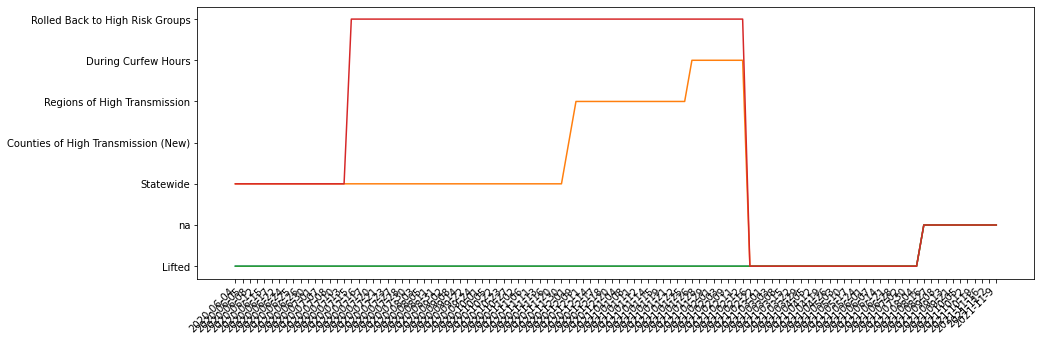

In [94]:
y_ticks = data['Stay at Home Order'].unique()
x_ticks = data.index

plt.figure(figsize=(15,5))
for s in states:
    plt.plot(data[data['State'] == s].index,data[data['State'] == s]['Stay at Home Order'])
plt.yticks(y_ticks)
plt.xticks(rotation = 45, ha='right')
plt.show()